In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/19Px-BTtZVXciTy5gybOyZsCGwPqKL-5F/view?usp=sharing

### Project Objective
This project applies **Clustering (Unsupervised Learning)** to segment retail customers based on their spending behavior. Using a dataset of customer transaction details, we apply **KMeans clustering** to group customers into meaningful segments (Platinum, Gold, Silver).  
The goal is to provide insights into **customer segmentation**, which businesses can use for **targeted marketing, loyalty programs, and personalized offers**.  

- **Dataset:** Customer spend data (monthly spend, visits, item purchases).  
- **Algorithm:** KMeans clustering.  
- **Metrics:** Elbow method & cluster means for interpretation.  
- **Outcome:** Customers categorized into spend-based segments, useful for business decision-making.  

#### Outline
- Step 1: Importing data & cleaning  
- Step 2: Exploratory Data Analysis (EDA)  
- Step 3: Data preprocessing & scaling  
- Step 4: KMeans clustering (Elbow method & optimal K)  
- Step 5: Segment interpretation (Platinum, Gold, Silver)  
- Step 6: Cluster prediction on new customers  

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Data Import & Preparation

In [2]:
# Data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Cust_Spend_Data.csv')
data.shape

(10, 7)

##### This code loads the customer spend dataset into a pandas DataFrame and checks its dimensions. It forms the foundation for all subsequent analysis.

In [5]:
# data sample
data.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


#### Feature Selection

In [7]:
# data frame without personal identity information
data = data.iloc[:, 2:]
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


##### Here, the dataset is trimmed to exclude personal identifiers. This ensures the clustering model is only trained on behavioral features like spend, visits, and items purchased.


### Scaling & Preprocessing

In [10]:
# Data scaling
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

# data after scaling
scaled_data = pd.DataFrame(scaled_data, columns=scale.get_feature_names_out())
scaled_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


##### Customer features are standardized to have mean 0 and unit variance. Scaling is essential for KMeans, as it ensures all features contribute equally to distance-based clustering.

### Random Initialization vs KMeans++

In [14]:
# Algo with random clusters
r_kmeans = KMeans(n_clusters=5, init='random', random_state=42, n_init='auto')
rkmeans = r_kmeans.fit_predict(scaled_data)
rkmeans = rkmeans + 1       # start cluster from 1 instead of 0

# data frame for predicted clusters
r_cluster = pd.DataFrame(rkmeans)

# concate with raw data
data['r_cluster'] = r_cluster

# data sample
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,4
2,7000,7,1,3,4,5
3,6500,5,1,1,4,5
4,6000,6,0,12,3,3
5,4000,3,0,1,8,4
6,2500,5,0,11,2,3
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [17]:
# Algo with random clusters with emprical probability distribution
r_kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')
rkmeans_plus = r_kmeans_plus.fit_predict(scaled_data)
rkmeans_plus = rkmeans_plus + 1       # start cluster from 1 instead of 0

# data frame for predicted clusters
r_cluster_plus = pd.DataFrame(rkmeans_plus)

# concate with raw data
data['r_cluster_plus'] = r_cluster_plus

# data sample
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster,r_cluster_plus
0,10000,2,1,1,0,1,1
1,7000,3,0,10,9,4,3
2,7000,7,1,3,4,5,1
3,6500,5,1,1,4,5,1
4,6000,6,0,12,3,3,4
5,4000,3,0,1,8,4,2
6,2500,5,0,11,2,3,4
7,2500,3,0,1,1,2,5
8,2000,2,0,2,2,2,5
9,1000,4,0,1,7,2,2


Here, we compare **two initialization strategies** for KMeans:
- **Random:** Cluster centers are picked arbitrarily, which can lead to poor convergence.  
- **KMeans++:** Selects initial centers in a smarter way, spreading them across the data.  

#### Finding Optimal Clusters (Elbow Method)

In [21]:
# Finding the optimum number of clusters

wcss = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


##### The Within-Cluster-Sum-of-Squares (WCSS) is computed for 1–10 clusters. The "Elbow" point in the WCSS plot indicates the optimal number of clusters.

### Elbow Method (WCSS Plot)

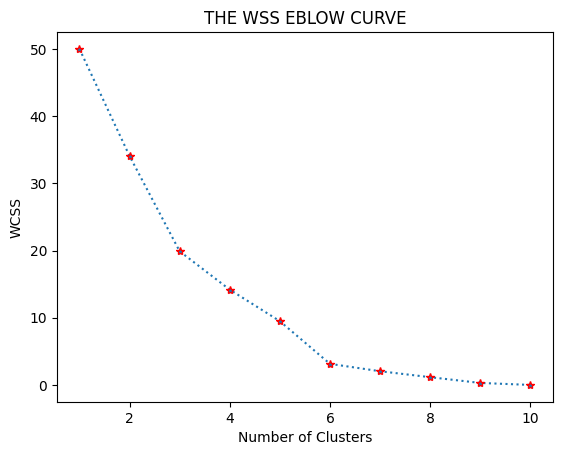

In [25]:
# Elbow plot(WSS Plot)
plt.plot(range(1,11), wcss, ls= ":", marker='*', markeredgecolor='red')
plt.title('THE WSS EBLOW CURVE')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The **Elbow Method** helps decide the optimal number of clusters by plotting the **Within-Cluster-Sum-of-Squares (WCSS)** against different `k` values.  
- At first, WCSS decreases sharply as more clusters are added.  
- After a certain point (“the elbow”), the reduction slows down.  
- That point indicates the best trade-off between model complexity and cluster compactness.  

### Final KMeans Model with Optimal Clusters

In [26]:
# Final Model with optimim cluster from WCSS plot
optimim_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
okmeans = optimim_kmeans.fit_predict(scaled_data)
okmeans = okmeans + 1       # start cluster from 1 instead of 0

# data frame for predicted clusters
optimum_cluster = pd.DataFrame(okmeans)

# concate with raw data
data['o_cluster'] = optimum_cluster

# data sample
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster,r_cluster_plus,o_cluster
0,10000,2,1,1,0,1,1,1
1,7000,3,0,10,9,4,3,3
2,7000,7,1,3,4,5,1,1
3,6500,5,1,1,4,5,1,1
4,6000,6,0,12,3,3,4,3
5,4000,3,0,1,8,4,2,2
6,2500,5,0,11,2,3,4,3
7,2500,3,0,1,1,2,5,2
8,2000,2,0,2,2,2,5,2
9,1000,4,0,1,7,2,2,2


##### Here, we apply KMeans with the **optimal number of clusters (3)** determined from the elbow plot. The resulting cluster labels (`o_cluster`) represent meaningful customer segments, ensuring the analysis is data-driven rather than arbitrary.


In [28]:
# Retaining the data with final clusters
data.drop(['r_cluster', 'r_cluster_plus'], axis=1, inplace=True)

# Data Sample
data.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,o_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,3
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,3


### Cluster Profiling

In [31]:
# Mean of the data columns based on the created clusters
cluster_mean = pd.DataFrame(round(data.groupby('o_cluster').mean(), 1))
cluster_mean_sorted = cluster_mean.sort_values(by='Avg_Mthly_Spend', ascending=False)
cluster_mean_sorted

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
o_cluster,,,,,
1,7833.3,4.7,1.0,1.7,2.7
3,5166.7,4.7,0.0,11.0,4.7
2,2375.0,3.0,0.0,1.2,4.5


##### After clustering, we calculate **average values of features** within each cluster. This allows us to profile segments, e.g.:  
- **Cluster 1:** High monthly spend → “Platinum”  
- **Cluster 2:** Moderate spend → “Gold”  
- **Cluster 3:** Low spend → “Silver”  

#### Final Clustering & Labeling

In [32]:
# Define the map
cluster_map = {1: 'Gold', 2: 'Silver', 3: 'Platinum'}

# Maping the column to the data
data['Cust_class'] = data['o_cluster'].map(cluster_map)

# data after maping
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,o_cluster,Cust_class
0,10000,2,1,1,0,1,Gold
1,7000,3,0,10,9,3,Platinum
2,7000,7,1,3,4,1,Gold
3,6500,5,1,1,4,1,Gold
4,6000,6,0,12,3,3,Platinum
5,4000,3,0,1,8,2,Silver
6,2500,5,0,11,2,3,Platinum
7,2500,3,0,1,1,2,Silver
8,2000,2,0,2,2,2,Silver
9,1000,4,0,1,7,2,Silver


The clusters are labeled with intuitive business-friendly names (Gold, Silver, Platinum). This makes results actionable for marketing and strategy teams.

## Prediction on New Data

In [52]:
# Cluster prediction for the new data - single row
new_data = {'Avg_Mthly_Spend': 9000,
            'No_Of_Visits': 5,
            'Apparel_Items': 2,
            'FnV_Items': 7,
            'Staples_Items': 6}

new_df = pd.DataFrame([new_data])

# Preparing the data for prediction on existing model
# scale the data
new_data_scale = scale.transform(new_df)
new_data_scaled = pd.DataFrame(new_data_scale, columns=new_df.columns)

# model prediction
data_pred = optimim_kmeans.predict(new_data_scaled)
data_pred += 1

# Cluster Class
if data_pred[0] == 1:
    print('The customer belongs to Gold Class')
elif data_pred[0] == 2:
    print('The customer belongs to Silver Class')
else:
    print('The customer belongs to Platinum Class')

The customer belongs to Gold Class


##### The model can predict the cluster of new customers by scaling their data and assigning them to the closest existing cluster. This enables real-world deployment.

In [70]:
# Cluster prediction for the new data - multiple rows
new_data_multi = {'Avg_Mthly_Spend': [2000, 6000, 3000],
                    'No_Of_Visits': [5, 6, 1],
                    'Apparel_Items': [1, 0, 1],
                    'FnV_Items': [7, 1, 4],
                    'Staples_Items': [6, 0, 0]}

new_data_multi = pd.DataFrame(new_data_multi)
new_data_multi

# Preparing the data for prediction on existing model
# scale the data
n_data_scale = scale.transform(new_data_multi)
n_data_scaled = pd.DataFrame(n_data_scale, columns=new_data_multi.columns)

# model prediction
n_data_pred = optimim_kmeans.predict(n_data_scaled)
n_data_pred += 1
new_data_multi['o_cluster'] = n_data_pred

# Mapping
new_data_multi['Cust_Class'] = new_data_multi['o_cluster'].map(cluster_map)
del new_data_multi['o_cluster']
new_data_multi

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cust_Class
0,2000,5,1,7,6,Platinum
1,6000,6,0,1,0,Gold
2,3000,1,1,4,0,Silver
